In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Load in ARO data
# fromfile constructs an array from binary or text data (we have binary data in this case)
nd = np.fromfile('/Users/sophiadacosta/Library/CloudStorage/OneDrive-UniversityofToronto/Python/AST325&326/AST326_ARO_CasA_calibration.dat') 

# Sanity check - make sure its an array
print(type(nd))

# Size of our data set (number of elements in the array)
print("Size of Data Set: ",nd.shape)


# Get inital information from data set
# astype method using numpy lets us "cast" or convert values from one data type to another
# follow the data types from the lab manual and define each variable in the order as described
# INT32 -> int is integer and 32 means it uses 32 bits or 4 bytes to store that integer value
nf = nd[0].astype(np.int32) # number of frequency channels
nt = nd[1].astype(np.int32) # number of time slices
ns = nd[2].astype(np.int32) # size of each time slice

# Sanity check!
print("Number of frequency channels:", nf)
print("Number of time slices:", nt)
print("Size of each time slice:", ns)

# The first bit of data that corresponds to the first "time slice" index 3 to ns 
# This is our list of frequencies.
nfl = nd[3:ns] # list of frequencies

# The rest of the data after the first time slice is taken
# we reshape it into a 2D array where we have each row representing one time slice
# the first column is the timestamp
# the seconds column is the elevation (of the telescope)
# the third column is the azimuth (of the telescope)
# all columns after contain the observational data
tmp = nd[ns:].reshape(-1,ns)

tm = tmp[:,0] # timestamp
el = tmp[:,1] # elevation
az = tmp[:,2] # azimuth

nd = tmp[:,3:] # observational data in the order of each frequency 


<class 'numpy.ndarray'>
Size of Data Set:  (51350,)
Number of frequency channels: 1024
Number of time slices: 49
Size of each time slice: 1027


In [39]:
import astropy.time
import astropy.coordinates

# Take our timestamp values and change format to modified julien date  (generic time unit) 
T=astropy.time.Time(tm,format="mjd")

# Search up Algonquin Radio Observatory location (latitude and longitude) and altitude 
ARO_lat = astropy.coordinates.Angle(' 45.9557d') #North (d = degrees)
ARO_lon = astropy.coordinates.Angle('-78.0720d') #West (W longitudes are negative)
ARO_alt = 260.4 #meters

# Define ARO location to standard coordinate system (in reference to that of earth)
ARO_loc = astropy.coordinates.EarthLocation(lat=ARO_lat, lon=ARO_lon, height=ARO_alt)

# Search up CassA right accension and declination
CasA_ra  = astropy.coordinates.Angle('23h 23m 26s')
CasA_dec = astropy.coordinates.Angle('58° 48′') # d and m as well for deg and arcmin

# Define the sky coordinates (stores RA and DEC in degrees)
c = astropy.coordinates.SkyCoord(ra=CasA_ra,dec=CasA_dec)

# Transform the sky coordinates to altitude and azimuth values based on ARO location at the time of observations
casa_aa = c.transform_to(astropy.coordinates.AltAz(location=ARO_loc,obstime=T));

# Define casA elevation and azimuth based on the altitude and azimuth vals we just got.
casa_el = casa_aa.alt.deg
casa_az = casa_aa.az.deg

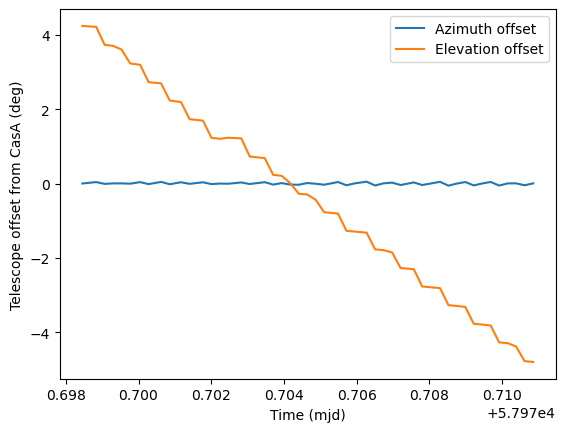

In [40]:
# Offsets of CassA in terms of ARO 
plt.plot(T.mjd,casa_az - az)
plt.plot(T.mjd,casa_el - el)
plt.legend(['Azimuth offset','Elevation offset'])
plt.xlabel('Time (mjd)')
plt.ylabel('Telescope offset from CasA (deg)');

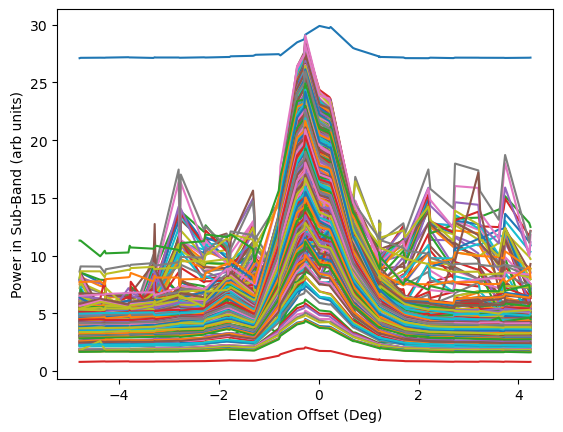

In [36]:
# Plot source intensity vs elevation offset of source and telescope
plt.plot(casa_el - el,nd)
plt.xlabel("Elevation Offset (Deg)")
plt.ylabel("Power in Sub-Band (arb units)");